# PART A: CONVOLUTIONAL NEURAL NETWORK FASHION MNIST

<img src="./img/dress.png" alt="Drawing" style="width: 600px;"/>

## Library Imports


- NumPy: use for numerical computations
- Matplotlib: use for plotting
- Pandas: we use this to store our model results
- Plotly: use for plotting
- Tensorflow: Keras with a Tensorflow backend is the primary deep learning library used
- Seaborn: use for plotting

In [1]:
#Libraries

#Basic
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import tensorflow as tf

#Tensorflow
from tensorflow import expand_dims
import keras_tuner
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Normalization, Dense, Conv2D, GlobalAveragePooling2D, MaxPool2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, Dropout, BatchNormalization, ReLU, Layer, Reshape, Flatten, Activation, Multiply, Resizing, Lambda, AveragePooling2D, Add, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau, TerminateOnNaN, TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
#Data Augmentation
from tensorflow.image import random_flip_left_right, random_crop, resize_with_crop_or_pad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2


## References

- [Tensorflow-Fashion-MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist)
- [What is Data Augmentation? Techniques, Examples & Benefits](https://research.aimultiple.com/data-augmentation/)
- [Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2](https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/)
- [Illustrated: 10 CNN Architectures](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)
- [Towards Theoretically Understanding Why SGD Generalizes Better Than ADAM in Deep Learning](https://arxiv.org/abs/2010.05627)
- [Use Early Stopping to Halt the Training of Neural Networks At the Right Time](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)
- [How to use Learning Curves to Diagnose Machine Learning Model Performance](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)
- [Image Augmentation on the fly using Keras ImageDataGenerator!](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)
- [Step by step VGG16 implementation in Keras for beginners](https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c)
- [An Overview of Regularization Techniques in Deep Learning (with Python code)](https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/)
- [Understand and Implement ResNet-50 with TensorFlow 2.0](https://towardsdatascience.com/understand-and-implement-resnet-50-with-tensorflow-2-0-1190b9b52691)
- [Getting started with KerasTuner](https://keras.io/guides/keras_tuner/getting_started/#query-the-results)
- [A Gentle Introduction to Batch Normalization for Deep Neural Networks](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/)
- [ResNet-50: The Basics and a Quick Tutorial](https://datagen.tech/guides/computer-vision/resnet-50/)
- [Adam vs. SGD: Closing the generalization gap on image classification](https://opt-ml.org/papers/2021/paper53.pdf)
- [A 2021 Guide to improving CNNs-Optimizers: Adam vs SGD](https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008)
- [Leaky ReLU vs. ReLU Activation Functions: Which is Better?](https://towardsdatascience.com/leaky-relu-vs-relu-activation-functions-which-is-better-1a1533d0a89f)

## Random Seed

Setting random seed for numpy and tensorflow

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

## Problem Statement

Our problem statement is to develop a deep learning model that is capable of classifiying items of clothing, from the Fashion MNIST data set. I.e. Implement an image classifier using a deep learning network.

### Our Goal

For the model are to develop a model that is able to generalize well to new data points (No overfitting)

## Background Information on the dataset

### What is [Fashion-MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist)?

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.[[0]](https://www.tensorflow.org/datasets/catalog/fashion_mnist#:~:text=Fashion%2DMNIST%20is%20a%20dataset%20of%20Zalando%27s%20article%20images%20consisting%20of%20a%20training%20set%20of%2060%2C000%20examples%20and%20a%20test%20set%20of%2010%2C000%20examples.%20Each%20example%20is%20a%2028x28%20grayscale%20image%2C%20associated%20with%20a%20label%20from%2010%20classes.)

## Data Ingestion

The Fashion-MNIST dataset is bulit-in tnesorflow. Therefore, we use a function to download the Fashion-MNIST dataset, we will make use of it to quickly load our data.

In [3]:
#Loading Data
from tensorflow.keras.datasets.fashion_mnist import load_data

## Data Splits

When training and evaluating our model, we will split our data into a training, validation, and testing set.

The training set will be used to train the model, the validation set for model tuning, and the testing set will be used to evaluate the final model, ensuring that it is able to generalize. (and does not overfit to the validation set as a result of our model tuning)

|**Split**|**Size**|
|-------- |--------|
|Training|50k|
|Validation|10k|
|Testing|10k|

10k samples was choosen as I feel 10k is suffient enough to check to if the model overfits

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
(X_train, y_train), (X_test, y_test) = load_data()
train_size = 50000
X_train, y_train, X_val, y_val = X_train[:train_size], y_train[:train_size], X_train[train_size:], y_train[train_size:]
X_train = np.reshape(X_train, (50000,28,28,1))
X_test = np.reshape(X_test, (10000,28,28,1))
X_val = np.reshape(X_val, (10000,28,28,1))

### Class Label

Each numbered label in the data set represents a specific article of clothing. To make the labels more readable, we will use a dictionary to map each number to the corresponding description.

In [6]:
class_labels = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
}

Each image is a 28x28 image. I set the image size here as a constant and there is no need to resize the images to the same size.

In [7]:
IMG_SIZE = 28

## Exploratory Data Analysis

### What do we want to find out?

#### General Dataset Information
- What are the dimensions of each image?
- What do the images look like for each class?

#### Missing Values
- How many missing values are there?
- Why are there missing values?
- What should be done about the missing values?

#### Distribution of Data
- What is the distribution of the pixels for each color channel?
- What is the class distribution? 
- Would accuracy be a useful metric to evaluate the model given the class distribution?

In [8]:
#What are the dimensions of each image?
print('Shape of image in X_train: ', X_train.shape)
print('Shape of image in X_test: ', X_test.shape)
print('Shape of image in X_val: ', X_val.shape)

Shape of image in X_train:  (50000, 28, 28, 1)
Shape of image in X_test:  (10000, 28, 28, 1)
Shape of image in X_val:  (10000, 28, 28, 1)


Each image is a 28x28 image, with only a single color channel (since it is a grayscale image, black and white)

The image sizes are intentionally small to match up with the image dimensions of the original MNIST dataset.

## General Dataset Information

Let's take a look at what the images look like.

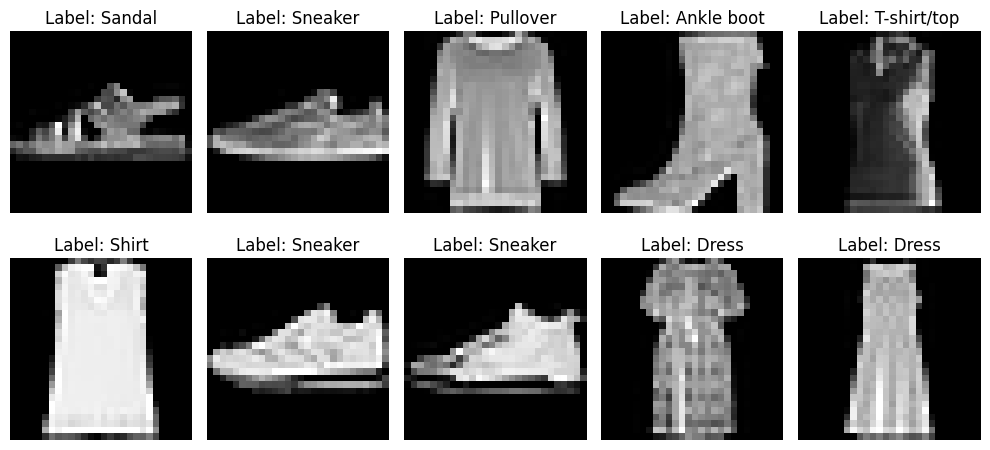

In [9]:
#show random pictures in the dataset
random_idxs = np.random.choice(X_train.shape[0], 10, replace=False) # Randomly Sample Images
fig, ax = plt.subplots(2, 5, figsize=(10, 5), tight_layout=True)

for idx, subplot in zip(random_idxs, ax.ravel()):
    subplot.axis("off")
    subplot.imshow(X_train[idx], cmap='gray')
    subplot.set_title(f"Label: {class_labels[y_train[idx]]}")

Let's take a look at what each class looks like.

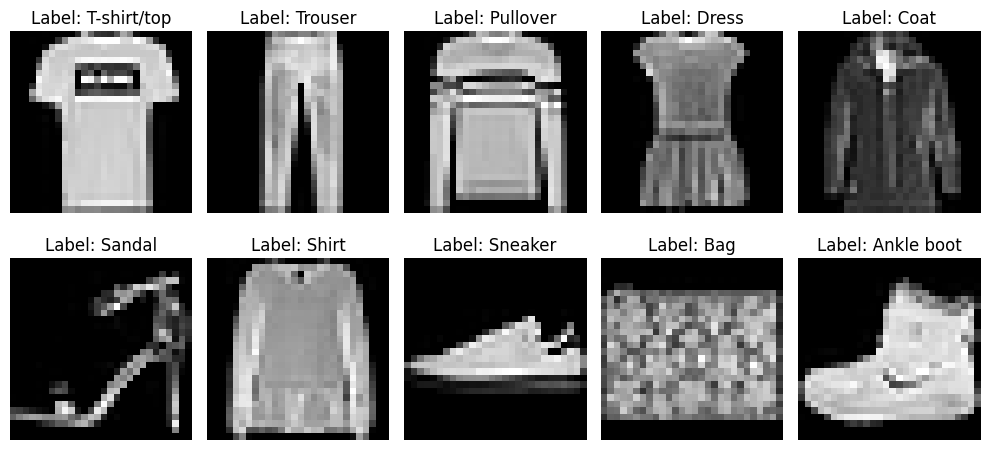

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5), tight_layout=True)
ax = ax.ravel()
for i in range(10):
    images = X_train[np.squeeze(y_train == i)][0]
    label = class_labels[i]
    subplot = ax[i]
    subplot.axis("off")
    subplot.imshow(images, cmap="gray")
    subplot.set_title(f"Label: {label}")

C:\Users\p2123037\AppData\Local\Temp\ipykernel_24828\3670808984.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


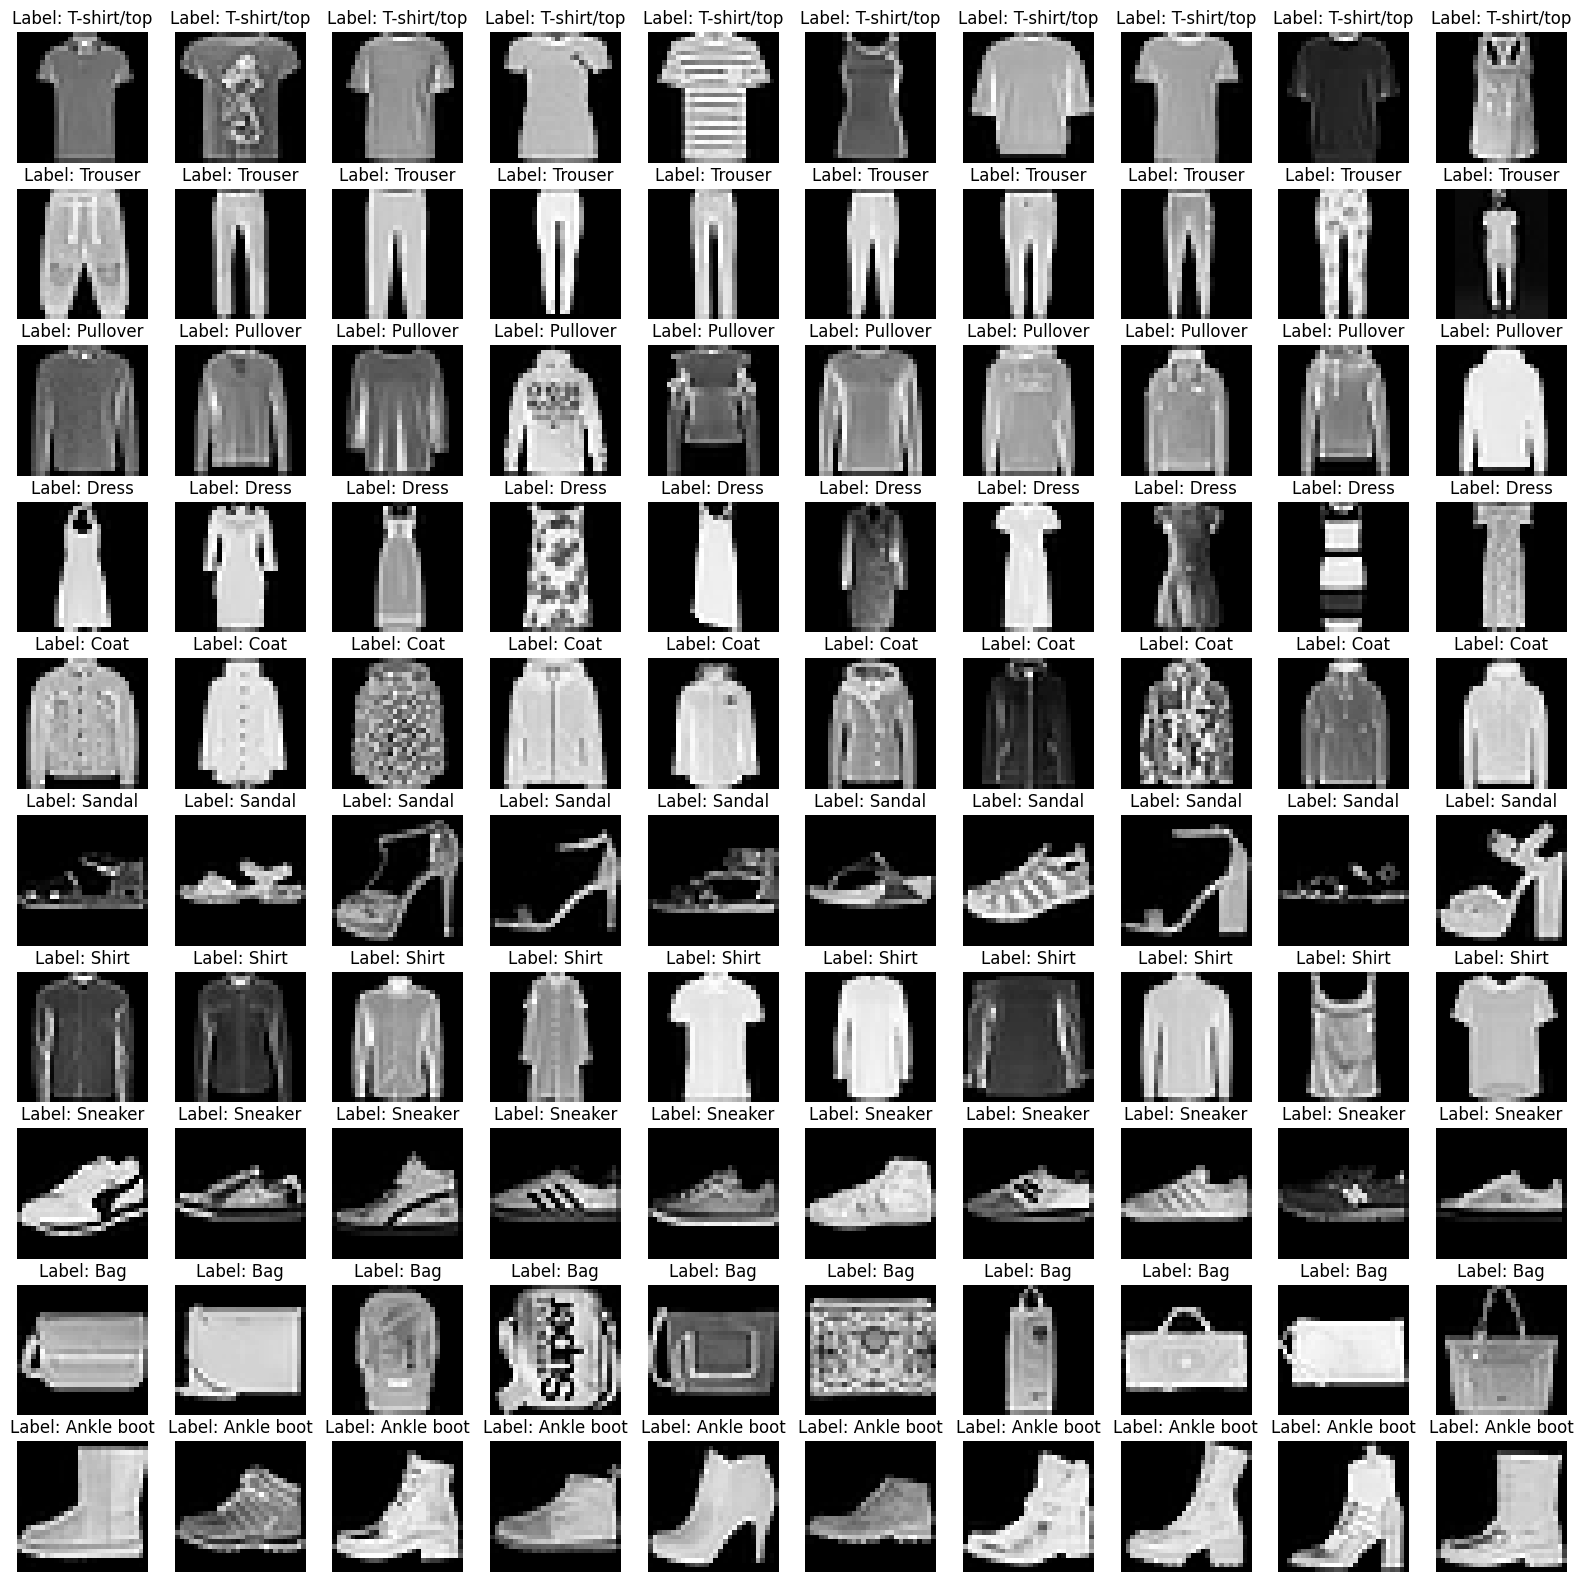

In [11]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(10):
    images = X_train[np.squeeze(y_train == i)]
    random_idxs = np.random.choice(images.shape[0], 10, replace=False)
    images = images[random_idxs]
    label = class_labels[i]
    for j in range(10):
        subplot = ax[i, j]
        subplot.axis("off")
        subplot.imshow(images[j], cmap="gray")
        subplot.set_title(f"Label: {label}")
fig.show()

Taking a look at the images for all the classes:
- It seems like the images are taken from same view and the orientation of each class is the same
- The size of the product of each class is around the same
- For some class such as bag and ankle boot the silhouette of the products are a little bit different

## Distribution of Data

Looking at the distrubtion of the data helps us decide on what metrics would be best to use, and if anything needs to be done to imbalanced classes if any.

In [12]:
#What is the class distribution? 
labels, counts = np.unique(y_train, return_counts=True)
for label, count in zip(labels, counts):
    print(f"{class_labels[label]}: {count}")

T-shirt/top: 4977
Trouser: 5012
Pullover: 4992
Dress: 4979
Coat: 4950
Sandal: 5004
Shirt: 5030
Sneaker: 5045
Bag: 5032
Ankle boot: 4979


<BarContainer object of 10 artists>

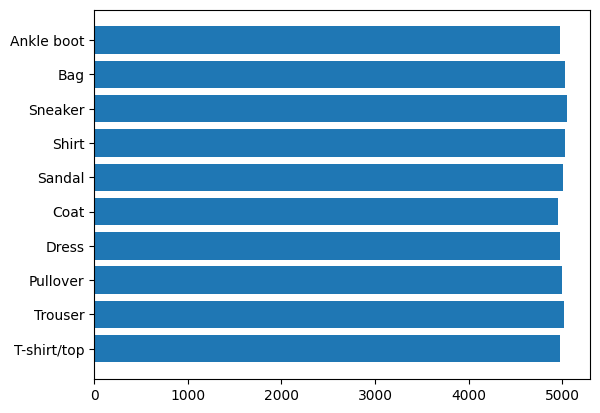

In [13]:
plt.barh(labels, counts, tick_label=list(class_labels.values()))

In [14]:
#What is the distribution of the pixels for each color channel (brightness)?

print("Max:", np.max(X_train))
print("Min:", np.min(X_train))

Max: 255
Min: 0


No suprises here that the pixels values are between 0 and 255

In [15]:
#Mean brightness
mean, std = np.mean(X_train), np.std(X_train)
print("Mean:", mean)
print("std:", std)

Mean: 72.80222186224489
std: 89.96003021102449


We can see that the mean brightness isnt that bright and there is variantion

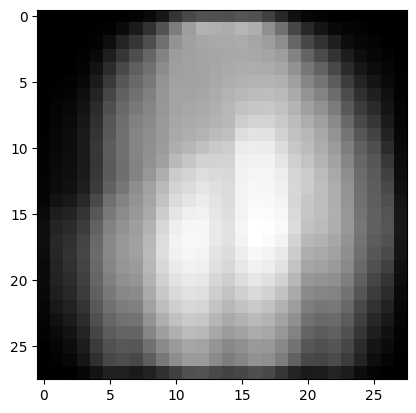

In [16]:
#Average image
plt.imshow(np.mean(X_train, axis=0) / 255, cmap="gray")

From the image above we cannot really deceiver what class it belongs to

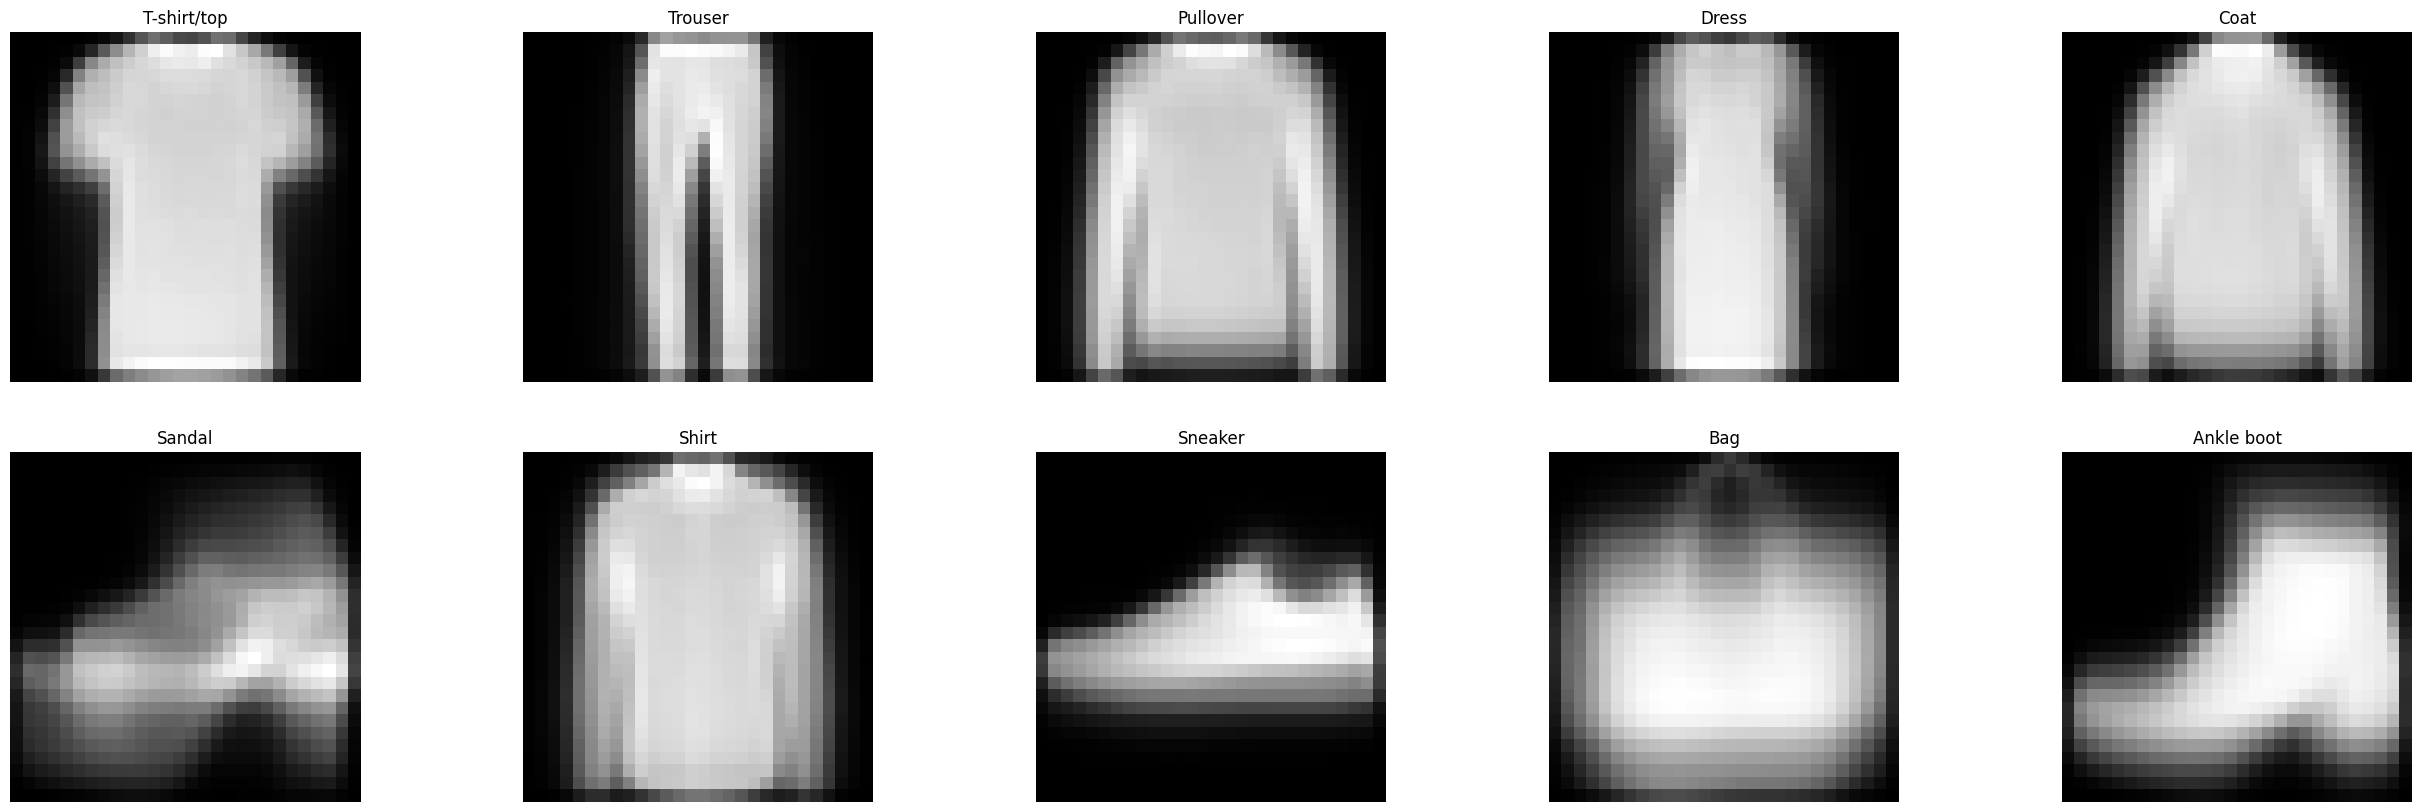

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(32, 10))

for idx, subplot in enumerate(ax.ravel()):
    avg_image = np.mean(X_train[np.squeeze(y_train == idx)], axis=0) / 255
    subplot.imshow(avg_image, cmap="gray")
    subplot.set_title(f"{class_labels[idx]}")
    subplot.axis("off")

From the average imgae for each class, we can see that we can deceiver roughly what each image represent, this shows that the images in each class is not very different from each other.

## Data Preprocessing

### Encoding targer labels

In [18]:
y_train = to_categorical(y_train) # one hot encode
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [19]:
print(y_train[0])
print("Label:", tf.argmax(y_train[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label: tf.Tensor(9, shape=(), dtype=int64)


### Normalisation

![title](./img/img1.png)

Subtracting the dataset mean serves to "center" the data. Additionally, you ideally would like to divide by the sttdev of that feature or pixel as well if you want to normalize each feature value to a z-score.

The reason we do both of those things is because in the process of training our network, we're going to be multiplying (weights) and adding to (biases) these initial inputs in order to cause activations that we then backpropogate with the gradients to train the model.

We'd like in this process for each feature to have a similar range so that our gradients don't go out of control (and that we only need one global learning rate multiplier).

Another way you can think about it is deep learning networks traditionally share many parameters - if you didn't scale your inputs in a way that resulted in similarly-ranged feature values sharing wouldn't happen very easily because to one part of the image weight w is a lot and to another it's too small.

In [20]:
X_train_norm = X_train / 255
X_val_norm = X_val / 255
X_test_norm = X_test / 255

C:\Users\p2123037\AppData\Local\Temp\ipykernel_24828\687698110.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


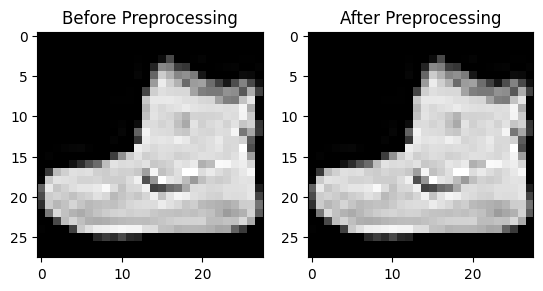

In [21]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(X_train[0], cmap='gray')
ax[0].set_title('Before Preprocessing')
ax[1].imshow(X_train_norm[0], cmap='gray')
ax[1].set_title('After Preprocessing')
fig.show()

### Data Augmentation

Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.[[1]](https://research.aimultiple.com/data-augmentation/#:~:text=Data%C2%A0augmentation%C2%A0is%C2%A0a%C2%A0set%C2%A0of%C2%A0techniques%C2%A0to%C2%A0artificially%C2%A0increase%C2%A0the%C2%A0amount%C2%A0of%C2%A0data%C2%A0by%C2%A0generating%C2%A0new%C2%A0data%C2%A0points%C2%A0from%C2%A0existing%C2%A0data.%C2%A0This%C2%A0includes%C2%A0making%C2%A0small%C2%A0changes%C2%A0to%C2%A0data%C2%A0or%C2%A0using%C2%A0deep%C2%A0learning%C2%A0models%C2%A0to%C2%A0generate%C2%A0new%C2%A0data%C2%A0points.) We will be making use of kera's ImageDataGenerator to help us in this process
#### Data Augmentation's importance
Data augmentation is useful to improve performance and outcomes of machine learning models by forming new and different examples to train datasets. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.[[2]](https://research.aimultiple.com/data-augmentation/#:~:text=Data%20augmentation%20is%20useful%20to%20improve%20performance%20and%20outcomes%20of%20machine%20learning%20models%20by%20forming%20new%20and%20different%20examples%20to%20train%20datasets.%20If%20the%20dataset%20in%20a%20machine%20learning%20model%20is%20rich%20and%20sufficient%2C%20the%20model%20performs%20better%20and%20more%20accurately)

I did not want to have too strong of a data augmentation to start with, out of fear that it might cause the model to overfit this simple data augmentation has been shown to be decently effective. Nevertheless, I will try out a stronger data augmentation method later on as part of my experimentation.

In [22]:
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1
)

In [23]:
datagen.fit(X_train_norm)

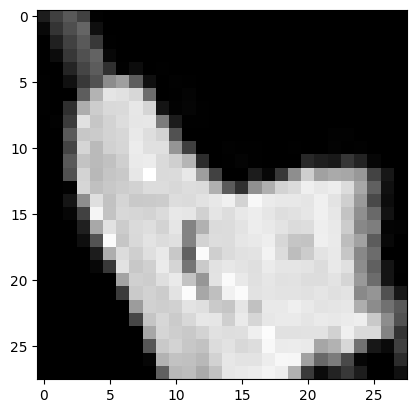

In [24]:
plt.imshow(datagen.random_transform(X_train_norm[0]), cmap='gray')

### CutMix Data Augmentation

As we know that to improve the performance of an ML model, one of the ways is to implement Data Augmentation in our data preprocessing steps. There are varuious ways of Data Augmentation, one such technique introduced recently is CutMix.

What is CutMix?

In CutMix augmentation we cut and paste random patches between the training images. The ground truth labels are mixed in proportion to the area of patches in the images. CutMix increases localization ability by making the model to focus on less discriminative parts of the object being classified and hence is also well suited for tasks like object detection. [[5]](https://sarthakforwet.medium.com/cutmix-a-new-strategy-for-data-augmentation-bbc1c3d29aab#27f9:~:text=In%20CutMix%20augmentation,object%20detection.)

In [25]:
AUTO = tf.data.AUTOTUNE

In [26]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.image.convert_image_dtype(image, tf.float32) / 255.0
    return image, label

In [27]:
train_ds_one = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(1024)
    .map(preprocess_image, num_parallel_calls=AUTO)
)
train_ds_two = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(1024)
    .map(preprocess_image, num_parallel_calls=AUTO)
)

test_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

test_ds = (
    test_ds.map(preprocess_image, num_parallel_calls=AUTO)
    .batch(128)
    .prefetch(AUTO)
)

train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))

In [28]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


In [29]:
@tf.function
def get_box(lambda_value):
    cut_rat = tf.math.sqrt(1.0 - lambda_value)

    cut_w = IMG_SIZE * cut_rat  # rw
    cut_w = tf.cast(cut_w, tf.int32)

    cut_h = IMG_SIZE * cut_rat  # rh
    cut_h = tf.cast(cut_h, tf.int32)

    cut_x = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # rx
    cut_y = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # ry

    boundaryx1 = tf.clip_by_value(cut_x[0] - cut_w // 2, 0, IMG_SIZE)
    boundaryy1 = tf.clip_by_value(cut_y[0] - cut_h // 2, 0, IMG_SIZE)
    bbx2 = tf.clip_by_value(cut_x[0] + cut_w // 2, 0, IMG_SIZE)
    bby2 = tf.clip_by_value(cut_y[0] + cut_h // 2, 0, IMG_SIZE)

    target_h = bby2 - boundaryy1
    if target_h == 0:
        target_h += 1

    target_w = bbx2 - boundaryx1
    if target_w == 0:
        target_w += 1

    return boundaryx1, boundaryy1, target_h, target_w

In [30]:
@tf.function
def cutmix(train_ds_one, train_ds_two):
    (image1, label1), (image2, label2) = train_ds_one, train_ds_two

    alpha = [0.25]
    beta = [0.25]

    # Get a sample from the Beta distribution
    lambda_value = sample_beta_distribution(1, alpha, beta)

    # Define Lambda
    lambda_value = lambda_value[0][0]

    # Get the bounding box offsets, heights and widths
    boundaryx1, boundaryy1, target_h, target_w = get_box(lambda_value)

    # Get a patch from the second image (`image2`)
    crop2 = tf.image.crop_to_bounding_box(
        image2, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image2` patch (`crop2`) with the same offset
    image2 = tf.image.pad_to_bounding_box(
        crop2, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )
    # Get a patch from the first image (`image1`)
    crop1 = tf.image.crop_to_bounding_box(
        image1, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image1` patch (`crop1`) with the same offset
    img1 = tf.image.pad_to_bounding_box(
        crop1, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )

    # Modify the first image by subtracting the patch from `image1`
    # (before applying the `image2` patch)
    image1 = image1 - img1
    # Add the modified `image1` and `image2`  together to get the CutMix image
    image = image1 + image2

    # Adjust Lambda in accordance to the pixel ration
    lambda_value = 1 - (target_w * target_h) / (IMG_SIZE * IMG_SIZE)
    lambda_value = tf.cast(lambda_value, tf.float32)

    # Combine the labels of both images
    label = lambda_value * label1 + (1 - lambda_value) * label2
    return image, label

In [31]:
train_ds_cmu = (
    train_ds.shuffle(1024)
    .map(cutmix, num_parallel_calls=AUTO)
    .batch(128)
    .prefetch(AUTO)
)

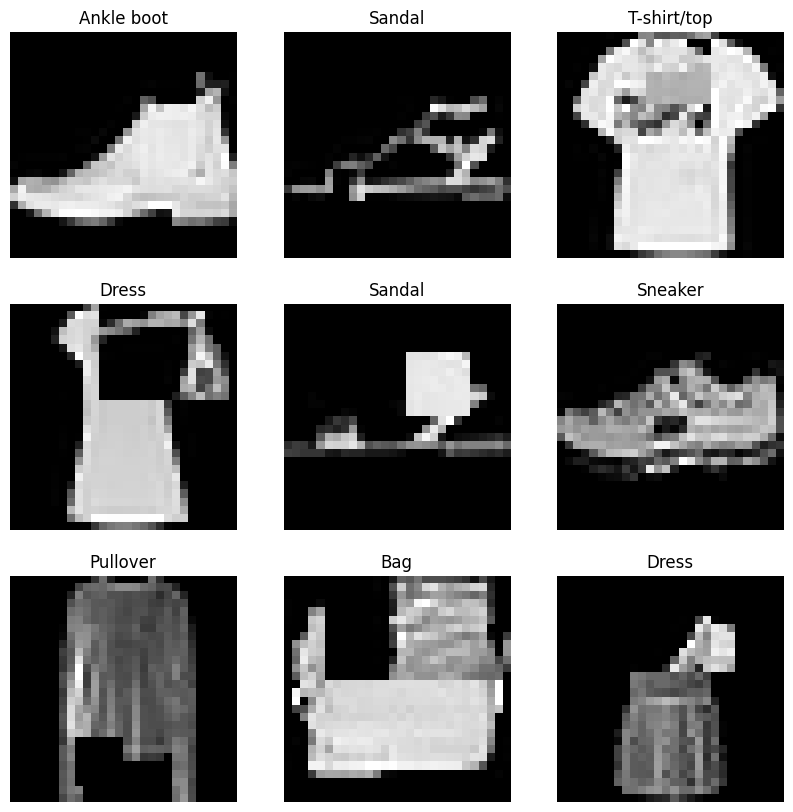

In [32]:
# Let's preview 9 samples from the dataset
image_batch, label_batch = next(iter(train_ds_cmu))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_labels[np.argmax(label_batch[i])])
    plt.imshow(image_batch[i], cmap='gray')
    plt.axis("off")

# Modelling

We will now proceed to modelling

For this project we will be using CNN to model our data

There are many CNN Architectures we can use, the following are just a few:

- LeNet-5
- AlexNet
- VGG-16
- Inception-v1
- Inception-v3
- ResNet-50
- Xception
- Inception-v4
- Inception-ResNets
- ResNeXt-50

### Callbacks
We use early callback and reduce learning rate on plateau

#### Ealry Stopping
Stop training when a monitored metric has stopped improving. This is good as we can have a large echpo cap and be ensured that our model wouldnt run unnessacrily if validation accuracy doesnt increase, saving us time.

#### ReduceLROnPlateau
Neither too high nor too low learning rate should be considered for training a NN. A large learning rate can miss the global minimum and in extreme cases can cause the model to diverge completely from the optimal solution. On the other hand, a small learning rate can stuck to a local minimum.

ReduceLROnPlateau purpose is to track your model's performance and reduce the learning rate when there is no improvement for x number of epochs. The intuition is that the model approached a sub-optimal solution with current learning rate and oscillate around the global minimum. Reducing the learning rate would enable the model to take smaller learning steps to the optimal solution of the cost function.

### Optimizer 

For all models, we will train them using adam. In the later part we will be trying out other optimizers to see if the model benfits from it.

For learning rate scheduling, I begin by adopting a basic learning rate scheduler, which is to use a a callback to Reduce the Learning Rate when the validation loss plateaus.

A problem with training neural networks is in the choice of the number of training epochs to use. Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.[[4]](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/#:~:text=A%20problem%20with,neural%20network%20models.) Therefore, we shall make use of ealry stopping, as our goal of training the model is to minimize the loss.

To make training the model and look at the results of each model easier, I have created a function that will run the model and store the results in a pandas dataframe.

### Evaluation 
We will be using accuarcy as the evaluation metric and also plot a learning curve of the loss of the model to check if the model overfits

### Why Learning Curve?
A learning curve is a plot of model learning performance over experience or time.

Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves.

Reviewing learning curves of models during training can be used to diagnose problems with learning, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative. 

### Learning Curve

In [33]:
def plot_loss_curve(model_history):
    model_history = pd.DataFrame(model_history)
    epochs = list(range(1, len(model_history) + 1))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=epochs, y=model_history["loss"],
                    mode='lines+markers',
                    name='Training Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=model_history["val_loss"],
                    mode='lines+markers',
                    name='Validation Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=model_history["accuracy"],
                    mode="lines+markers",
                    name="Training Accuracy"))
    fig.add_trace(go.Scatter(x=epochs, y=model_history["val_accuracy"],
                           mode="lines+markers",
                           name="Validation Accuracy"))
    fig.update_layout(
      title="Loss/Acc Plot",
      xaxis_title="Epochs",
      yaxis_title="Loss/Acc",
      )

    return fig

### Default Parameters

In [34]:
LR = 0.001 
MOMENTUM = 0.9
WEIGHT_DECAY = 0.0005
VAL_SPLIT = 0.2 
MAX_EPOCHS = 100 
BATCH_SIZE = 128
starting_hparams = {
    "val_split" : VAL_SPLIT,
    "max_epochs" : MAX_EPOCHS,
    "batch_size" : BATCH_SIZE
}

### Results DataFrame

In [35]:
result_history = pd.DataFrame({
          "Model Name" : [],
          "Epochs" : [],
          "Batch Size" : [],
          "Train Loss" : [],
          "Test Loss" : [],
          "Train Acc" : [],
          "Test Acc" : [],
          "[Train - Test] Acc" : []
      })

### Evaluation Function
I created this funcion so that it would be easier to call the model and run as my cumix data and normal data requires different syntax to call it. This due to my cutmix data being in the datatype of a tensor and the norm data in the type is numpy array

In [36]:
def evaluate_model(model, training_data, validation_data, result_history = result_history, data_aug=False, cutmix=False, hyperparameters = starting_hparams, callbacks = None, plot_loss = True, remarks = ""):
    """
    Evaluate a model. Assumes the model has already been compiled, so compilation and choice of optimizer must be done beforehand
    """
    # Train Model
    tf.keras.backend.clear_session() # clear all previous models from memorY
    if callbacks is None:
        callbacks = [EarlyStopping(monitor='val_accuracy',patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)]
    name = model.name
    validation_split = hyperparameters["val_split"]
    epochs = hyperparameters["max_epochs"]
    batch_size = hyperparameters["batch_size"]
    print(f"Training {name}")
    if data_aug == False:
        X_train, y_train = training_data
        if validation_data is None:
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split,callbacks=callbacks)
        else:
            history = model.fit(X_train, y_train, validation_data=validation_data, epochs=epochs, batch_size=batch_size,callbacks=callbacks)
        history = history.history
    else:
        if cutmix == True:
            if validation_data is None:
                history = model.fit(training_data, epochs=epochs, batch_size=batch_size, validation_split=validation_split,callbacks=callbacks)
            else:
                history = model.fit(training_data, validation_data=validation_data, epochs=epochs, batch_size=batch_size,callbacks=callbacks)
            history = history.history
        else:
            X_train, y_train = training_data
            if validation_data is None:
                history = model.fit(datagen.flow(X_train, y_train), epochs=epochs, batch_size=batch_size, validation_split=validation_split, callbacks=callbacks)
            else:
                history = model.fit(datagen.flow(X_train, y_train), validation_data=validation_data, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
            history = history.history
      # print(history)
    if plot_loss:
        fig = plot_loss_curve(history)
    else:
        fig = None
    result = dict()
    result["Epochs"] = len(history["loss"])
    result["Batch Size"] = batch_size
    result["Model Name"] = name
    best_val_idx = np.argmax(history["val_accuracy"])
    result["Train Loss"] = history["loss"][best_val_idx]
    result["Test Loss"] = history["val_loss"][best_val_idx]
    result["Train Acc"] = history["accuracy"][best_val_idx]
    result["Test Acc"] = history["val_accuracy"][best_val_idx]
    result["[Train - Test] Acc"] = result["Train Acc"] - result["Test Acc"]
    tf.keras.backend.clear_session() # clear all previous models from memory
    return pd.Series(result), fig

## Baseline Model (ANN) aka Fully connected nural network

As our initial baseline, I choose to build a fully connected neural network with 4 hidden layers.

In [37]:
def ANN(optimizer, name='ANN'):
    model = Sequential(name = name)
    model.add(Flatten())
    model.add(Dense(units=512, activation='ReLU'))
    model.add(Dense(units=256, activation='ReLU'))
    model.add(Dense(units=128, activation='ReLU'))
    model.add(Dense(units=64, activation='ReLU'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [38]:
#optimizer = SGD(learning_rate=LR, momentum=MOMENTUM)
model_ANN = ANN('adam')
results, fig = evaluate_model(model_ANN, (X_train_norm, y_train), (X_val_norm, y_val))

Training ANN
Epoch 1/100
391/391 [==============================] - 2s 4ms/step - loss: 0.5159 - accuracy: 0.8149 - val_loss: 0.4126 - val_accuracy: 0.8554 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8663 - val_loss: 0.3502 - val_accuracy: 0.8723 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 1s 3ms/step - loss: 0.3291 - accuracy: 0.8790 - val_loss: 0.3452 - val_accuracy: 0.8778 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 1s 3ms/step - loss: 0.3047 - accuracy: 0.8870 - val_loss: 0.3789 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 1s 3ms/step - loss: 0.2889 - accuracy: 0.8929 - val_loss: 0.3206 - val_accuracy: 0.8843 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 1s 3ms/step - loss: 0.2707 - accuracy: 0.8994 - val_loss: 0.3298 - val_accuracy: 0.8834 - lr: 0.0010
Epoch 7/100
391/391 [==============================

In [39]:
model_ANN.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable p

In [40]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      32
Batch Size                 128
Model Name                 ANN
Train Loss            0.100475
Test Loss             0.351059
Train Acc              0.96178
Test Acc                0.9019
[Train - Test] Acc     0.05988
dtype: object

In [41]:
fig.show()

From the loss plot we can see that our model: 
- BNegins to overfit slightly as it approaches 24 epochs as the validation loss begins to increase just ever so slightly.
- Is strong with a validation accuracy of almost 90%
- Overall, our baseline is a good benchmark for our other models. It performs well enough but suffers from slight overfitting.

### ANN with data augmentation

We shall try some basic data augmentation techniques to see if our model performs better

In [42]:
model_ANN_DA = ANN('adam', name = 'ANN_DA')
results, fig = evaluate_model(model_ANN_DA, (X_train_norm, y_train), (X_val_norm, y_val), data_aug=True)

Training ANN_DA
Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5758 - accuracy: 0.3982 - val_loss: 1.2699 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3283 - accuracy: 0.4865 - val_loss: 1.1466 - val_accuracy: 0.5650 - lr: 0.0010
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2409 - accuracy: 0.5181 - val_loss: 1.2084 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1834 - accuracy: 0.5419 - val_loss: 0.9923 - val_accuracy: 0.6033 - lr: 0.0010
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1348 - accuracy: 0.5598 - val_loss: 0.9967 - val_accuracy: 0.6183 - lr: 0.0010
Epoch 6/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1102 - accuracy: 0.5725 - val_loss: 1.0030 - val_accuracy: 0.6022 - lr: 0.0010
Epoch 7/100
1563/1563 [=======

In [44]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      51
Batch Size                 128
Model Name              ANN_DA
Train Loss            0.788597
Test Loss             0.693161
Train Acc              0.70286
Test Acc                 0.735
[Train - Test] Acc    -0.03214
dtype: object

In [45]:
fig.show()

### ANN With L2 Regularization

Instead of applying data augmentation, I try just introducing some weight decay (L2 Regularization) to reduce the variance of the model.

From the learning plot we can see that the model:
- The model underfits
- The model gives a much worse validation accuracy compared to without base data augmentation

In [46]:
def ANN_Regularization(optimizer, name='ANN_l2'):
    model = Sequential(name = name)
    model.add(Flatten())
    model.add(Dense(units=512, activation='ReLU', kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=256, activation='ReLU', kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=128, activation='ReLU', kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=64, activation='ReLU', kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=10, activation='softmax', kernel_regularizer=l2(WEIGHT_DECAY)))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [47]:
model_ANN_l2 = ANN_Regularization('adam')
results, fig = evaluate_model(model_ANN_l2, (X_train_norm, y_train), (X_val_norm, y_val))

Training ANN_l2
Epoch 1/100
391/391 [==============================] - 2s 4ms/step - loss: 0.9148 - accuracy: 0.8093 - val_loss: 0.7164 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 0.6502 - accuracy: 0.8568 - val_loss: 0.5935 - val_accuracy: 0.8683 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 1s 4ms/step - loss: 0.5672 - accuracy: 0.8666 - val_loss: 0.5958 - val_accuracy: 0.8567 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 1s 3ms/step - loss: 0.5216 - accuracy: 0.8737 - val_loss: 0.5389 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 1s 4ms/step - loss: 0.4985 - accuracy: 0.8740 - val_loss: 0.4926 - val_accuracy: 0.8751 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 1s 4ms/step - loss: 0.4691 - accuracy: 0.8821 - val_loss: 0.5175 - val_accuracy: 0.8653 - lr: 0.0010
Epoch 7/100
391/391 [===========================

In [49]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      48
Batch Size                 128
Model Name              ANN_l2
Train Loss            0.271041
Test Loss             0.392379
Train Acc              0.93966
Test Acc                0.8964
[Train - Test] Acc     0.04326
dtype: object

In [50]:
fig.show()

From the learning plot we can see that the model: 
- Does not overfit at all. In fact the model fits perfectly, with the validation loss decreasing with the training loss.
- In comparison to the baseline model, helps deal with the slight overfitting it had while still maintaining around the same validation accuracy


### Baseline with cutmix

In [51]:
model_ANN_CM = ANN('adam', name = 'ANN_CM')
results, fig = evaluate_model(model_ANN_CM, train_ds_cmu, test_ds, data_aug=True, cutmix=True)

Training ANN_CM
Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 1.2063 - accuracy: 0.6636 - val_loss: 0.5383 - val_accuracy: 0.8253 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 2s 6ms/step - loss: 1.0643 - accuracy: 0.7120 - val_loss: 0.4669 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 2s 6ms/step - loss: 1.0192 - accuracy: 0.7250 - val_loss: 0.4476 - val_accuracy: 0.8592 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 2s 6ms/step - loss: 0.9896 - accuracy: 0.7339 - val_loss: 0.4071 - val_accuracy: 0.8632 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 2s 6ms/step - loss: 0.9753 - accuracy: 0.7429 - val_loss: 0.4038 - val_accuracy: 0.8682 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 2s 6ms/step - loss: 0.9506 - accuracy: 0.7474 - val_loss: 0.4097 - val_accuracy: 0.8686 - lr: 0.0010
Epoch 7/100
391/391 [===========================

In [52]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      55
Batch Size                 128
Model Name              ANN_CM
Train Loss            0.777702
Test Loss             0.282544
Train Acc              0.80818
Test Acc                0.9072
[Train - Test] Acc    -0.09902
dtype: object

In [53]:
fig.show()

From the learning plot we can see that the model:
- Underfits as the validation loss is lower than the training loss
- Cutmix data augmentation gives us a slightly higher validation accuracycompared to without cutmix

### Conclusions we can make from our ANN (Baseline Model)
The normal ANN model performs well on our dataset giving a relatively high validation accuracy of 90%. However, the model does overfit slightly. The problem is solved by adding l2 regularisation. The other two models (ANN with Basic Data Augmentation and ANN with Cutmix) results weren't good enough to be considered. Therefore the best model from ANN is ANN with l2 regularisation and it will be our baseline model to compare the future models we test.

## VGG16

<img src="./img/VGG.png" alt="VGG" style="width: 600px;"/>

We will construct a simple CNN based on the VGG16 architecture

Instead of just wholesale taking the VGG architecture, I made certain improvements. The improvements are listed below

- Added Batch Normalization: BN has a regularizing effect on a CNN, by normalising inputs to layers deeper into a network)
- L2 Regularization: To further reduce overfitting.

This leaves us with a total of 16 layers (13 convolutional layers and 3 dense layers)

Why not add a dropout layer?

Batch normalization offers some regularization effect, reducing generalization error, perhaps no longer requiring the use of dropout for regularization. Further, it may not be a good idea to use batch normalization and dropout in the same network. The reason is that the statistics used to normalize the activations of the prior layer may become noisy given the random dropping out of nodes during the dropout procedure.


### VGG with batch normalization and l2 regularization

#### Why add batch normalization and l2 regularization?

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.[[6]](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/#:~:text=Batch%20normalization%20is%20a%20technique%20for%20training%20very%20deep%20neural%20networks%20that%20standardizes%20the%20inputs%20to%20a%20layer%20for%20each%20mini%2Dbatch.%20This%20has%20the%20effect%20of%20stabilizing%20the%20learning%20process%20and%20dramatically%20reducing%20the%20number%20of%20training%20epochs%20required%20to%20train%20deep%20networks.)

Before or after the nonlinearity ?

Historically, BN layer is positioned right before the nonlinear function, however some experiments showed that positioning BN layers right after the nonlinear function leads to better results. Still, many commonly used architecture of transfer learning apply BN before nonlinearity (ResNet, mobilenet-v2 etc). As far as I know, this question is still discussed and there is no right answer but for my VGG16 model I put it after the activation.

Performing L2 regularization encourages the weight values towards zero (but not exactly zero). Intuitively speaking smaller weights reduce the impact of the hidden neurons. In that case, those hidden neurons become neglectable and the overall complexity of the neural network gets reduced. Therefore we will be add L2 regularization to all our convolutional layers and dense layers




In [38]:
def VGG16_BN_l2(optimizer, name = 'VGG16_BN_l2'):
    model = Sequential(name=name)
    
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=10, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [66]:
model_VGG16_BN_l2 = VGG16_BN_l2('adam')

In [67]:
results, fig = evaluate_model(model_VGG16_BN_l2, (X_train_norm, y_train), (X_val_norm,y_val))

Training VGG16_BN_l2
Epoch 1/100
391/391 [==============================] - 36s 81ms/step - loss: 3.2114 - accuracy: 0.6625 - val_loss: 3.4706 - val_accuracy: 0.2809 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 29s 75ms/step - loss: 1.2949 - accuracy: 0.8321 - val_loss: 2.0763 - val_accuracy: 0.5952 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 30s 76ms/step - loss: 0.8248 - accuracy: 0.8722 - val_loss: 0.9118 - val_accuracy: 0.8195 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 31s 79ms/step - loss: 0.6305 - accuracy: 0.8888 - val_loss: 0.6455 - val_accuracy: 0.8633 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 32s 83ms/step - loss: 0.5468 - accuracy: 0.8977 - val_loss: 0.5829 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 30s 76ms/step - loss: 3.3107 - accuracy: 0.6773 - val_loss: 5.1436 - val_accuracy: 0.2793 - lr: 0.0010
Epoch 7/100
391/391 [==========

In [68]:
model_VGG16_BN_l2.summary()

Model: "VGG16_BN_l2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       

In [69]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                         39
Batch Size                    128
Model Name            VGG16_BN_l2
Train Loss               0.169886
Test Loss                0.413067
Train Acc                 0.99056
Test Acc                   0.9285
[Train - Test] Acc        0.06206
dtype: object

In [70]:
fig.show()

From the learning plot we can see that the model:
- Overfits ever so slightly, vcalidation loss increases slightly towards the end
- In comparison to the baseline model performs better, with a higher validation accuracy of 93%
- Overall performs well on the dataset

### VGG with batch normalization and l2 regularization and basic data augmentation

In [71]:
model_VGG16_BN_l2_DA = VGG16_BN_l2('adam', name = 'VGG16_BN_l2_DA')
results, fig = evaluate_model(model_VGG16_BN_l2_DA, (X_train_norm, y_train), (X_val_norm,y_val), data_aug=True)

Training VGG16_BN_l2_DA
Epoch 1/100
1563/1563 [==============================] - 71s 45ms/step - loss: 2.7048 - accuracy: 0.3044 - val_loss: 1.8376 - val_accuracy: 0.3366 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6418 - accuracy: 0.4468 - val_loss: 1.5468 - val_accuracy: 0.5141 - lr: 0.0010
Epoch 3/100
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3917 - accuracy: 0.5595 - val_loss: 1.7063 - val_accuracy: 0.4579 - lr: 0.0010
Epoch 4/100
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2741 - accuracy: 0.6071 - val_loss: 1.2626 - val_accuracy: 0.6151 - lr: 0.0010
Epoch 5/100
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1569 - accuracy: 0.6446 - val_loss: 1.0388 - val_accuracy: 0.6828 - lr: 0.0010
Epoch 6/100
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0836 - accuracy: 0.6684 - val_loss: 1.1748 - val_accuracy: 0.6131 - lr: 0.0010
Epoch 7/100
1563

In [72]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                            79
Batch Size                       128
Model Name            VGG16_BN_l2_DA
Train Loss                   0.49012
Test Loss                   0.478842
Train Acc                    0.85892
Test Acc                      0.8604
[Train - Test] Acc          -0.00148
dtype: object

In [73]:
fig.show()

From the learning plot we can see that the model:
- The model performs worse with basic data augmentation with a validation accucary of 85% (Worse than our baseline model)
- On the bright side the model fits very well as the validation loss is decreasing at the same rate as training loss and end with similar loss 

### VGG with batch normalization and l2 regularization and cutmix data augmentation

In [43]:
model_VGG16_BN_l2_CM = VGG16_BN_l2('adam', 'VGG16_BN_l2_CM')
results, fig = evaluate_model(model_VGG16_BN_l2_CM, train_ds_cmu, test_ds, data_aug=True, cutmix=True)

Training VGG16_BN_l2_CM
Epoch 1/100
391/391 [==============================] - 14s 32ms/step - loss: 3.7627 - accuracy: 0.4632 - val_loss: 3.1327 - val_accuracy: 0.1751 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 12s 30ms/step - loss: 1.8656 - accuracy: 0.6579 - val_loss: 1.7971 - val_accuracy: 0.4611 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 12s 30ms/step - loss: 1.4434 - accuracy: 0.7121 - val_loss: 0.8704 - val_accuracy: 0.8173 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 12s 30ms/step - loss: 1.2815 - accuracy: 0.7366 - val_loss: 0.7315 - val_accuracy: 0.8636 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 12s 30ms/step - loss: 1.1684 - accuracy: 0.7579 - val_loss: 0.7726 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 12s 30ms/step - loss: 1.1130 - accuracy: 0.7660 - val_loss: 0.5945 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 7/100
391/391 [=======

In [44]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\p2123037\AppData\Local\Temp\ipykernel_24828\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                            78
Batch Size                       128
Model Name            VGG16_BN_l2_CM
Train Loss                   0.63989
Test Loss                   0.256793
Train Acc                    0.89376
Test Acc                      0.9498
[Train - Test] Acc          -0.05604
dtype: object

In [45]:
fig.show()

From the learning plot we can see that the model:
- The model underfits
- The best validation accuracy (95%) thus far by using CutMix, suggesting that it would be good to continue using it.

### Conclusion
- VGG16 performs better than our baseline model 
- Best version was VGG16 with cutmix data augmentation

## Resnet50

<img src="./img/resnet.png" alt="pic of resnet 50" style="width: 600px;"/>

What Is the ResNet-50 Model?

ResNet stands for Residual Network and is a specific type of convolutional neural network (CNN) introduced in the 2015 paper “Deep Residual Learning for Image Recognition” by He Kaiming, Zhang Xiangyu, Ren Shaoqing, and Sun Jian. CNNs are commonly used to power computer vision applications.

ResNet-50 is a 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer). Residual neural networks are a type of artificial neural network (ANN) that forms networks by stacking residual blocks.

In [77]:
def res_identity(x, filters): 
  #renet block where dimension doesnot change.
  #The skip connection is just simple identity conncection
  #we will have 3 blocks and then input will be added

  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)
  # x = Activation(activations.relu)(x)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation('relu')(x)

  return x

In [78]:
def res_conv(x, s, filters):
  '''
  here the input size changes''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation('relu')(x)

  return x

In [79]:
def resnet50(name='Resnet50'):

  input_im = Input(shape=(28,28,1))
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(len(class_labels), activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  model = Model(inputs=input_im, outputs=x, name=name)

  return model

In [80]:
resnet50_model = resnet50()

In [81]:
resnet50_model.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 14, 14, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

In [82]:
resnet50_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
results, fig = evaluate_model(resnet50_model, (X_train_norm, y_train), (X_val_norm,y_val))

Training Resnet50
Epoch 1/100
391/391 [==============================] - 37s 83ms/step - loss: 8.3686 - accuracy: 0.7861 - val_loss: 7.9725 - val_accuracy: 0.5035 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 30s 78ms/step - loss: 5.7031 - accuracy: 0.8635 - val_loss: 4.9468 - val_accuracy: 0.7853 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 30s 78ms/step - loss: 4.0796 - accuracy: 0.8576 - val_loss: 3.4951 - val_accuracy: 0.8629 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 30s 77ms/step - loss: 2.9407 - accuracy: 0.8835 - val_loss: 2.6517 - val_accuracy: 0.8311 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 30s 77ms/step - loss: 2.1734 - accuracy: 0.8969 - val_loss: 1.9586 - val_accuracy: 0.8763 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 30s 77ms/step - loss: 2.0583 - accuracy: 0.8755 - val_loss: 2.1062 - val_accuracy: 0.8623 - lr: 0.0010
Epoch 7/100
391/391 [=============

In [84]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      33
Batch Size                 128
Model Name            Resnet50
Train Loss            0.409807
Test Loss             0.474359
Train Acc               0.9389
Test Acc                0.9175
[Train - Test] Acc      0.0214
dtype: object

In [85]:
fig.show()

From the learning plot we can see that the model:
- Overfits as the validation loss line starts the part ways with the training loss line showing that validation loss is increasing towards the end. (Use plotly feature to zoom in for a better look)
- Model performace is about the same as our baseline model around 90% validation accuracy 

### Resnet50 with basic data augmentation

In [86]:
model_resnet50_DA = resnet50(name='resnet50_DA')
model_resnet50_DA.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
results, fig = evaluate_model(model_resnet50_DA, (X_train_norm, y_train), (X_val_norm,y_val), data_aug=True)

Training resnet50_DA
Epoch 1/100
1563/1563 [==============================] - 97s 60ms/step - loss: 8.2399 - accuracy: 0.3581 - val_loss: 36.5397 - val_accuracy: 0.1949 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 92s 59ms/step - loss: 5.0386 - accuracy: 0.3306 - val_loss: 3.4422 - val_accuracy: 0.4842 - lr: 0.0010
Epoch 3/100
1563/1563 [==============================] - 92s 59ms/step - loss: 3.2253 - accuracy: 0.4357 - val_loss: 33.0000 - val_accuracy: 0.4962 - lr: 0.0010
Epoch 4/100
1563/1563 [==============================] - 91s 59ms/step - loss: 2.9030 - accuracy: 0.4591 - val_loss: 4.8634 - val_accuracy: 0.3808 - lr: 0.0010
Epoch 5/100
1563/1563 [==============================] - 92s 59ms/step - loss: 2.7666 - accuracy: 0.4535 - val_loss: 2.3787 - val_accuracy: 0.5334 - lr: 0.0010
Epoch 6/100
1563/1563 [==============================] - 92s 59ms/step - loss: 2.4462 - accuracy: 0.4731 - val_loss: 11918.8359 - val_accuracy: 0.0996 - lr: 0.0010
Epoch 7/100
1

In [87]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                         49
Batch Size                    128
Model Name            resnet50_DA
Train Loss               0.649827
Test Loss                0.592756
Train Acc                  0.8028
Test Acc                   0.8229
[Train - Test] Acc        -0.0201
dtype: object

In [88]:
fig.show()

From the learning plot we can see that the model:
- The model doesnt overfit anymore (expected as data augmentation helps a model with generalisation)
- The model performs horrible with validation accuracy of 82% worse than baseline model

### Resnet50 with cutmix data augmentation

In [89]:
model_resnet50_DA_CM = resnet50(name='resnet50_DA_CM')
model_resnet50_DA_CM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
results, fig = evaluate_model(model_resnet50_DA_CM, train_ds_cmu, test_ds, data_aug=True, cutmix=True)

Training resnet50_DA_CM
Epoch 1/100
391/391 [==============================] - 37s 82ms/step - loss: 9.1057 - accuracy: 0.6200 - val_loss: 7.6376 - val_accuracy: 0.6144 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 31s 79ms/step - loss: 6.6425 - accuracy: 0.6772 - val_loss: 6.4129 - val_accuracy: 0.3204 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 31s 79ms/step - loss: 4.9856 - accuracy: 0.6987 - val_loss: 3.7707 - val_accuracy: 0.7991 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 31s 79ms/step - loss: 3.7127 - accuracy: 0.7383 - val_loss: 2.8188 - val_accuracy: 0.8370 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 31s 79ms/step - loss: 2.9954 - accuracy: 0.7426 - val_loss: 14.2206 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 31s 79ms/step - loss: 2.5375 - accuracy: 0.7413 - val_loss: 128.5129 - val_accuracy: 0.3430 - lr: 0.0010
Epoch 7/100
391/391 [====

In [90]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                            75
Batch Size                       128
Model Name            resnet50_DA_CM
Train Loss                   0.78301
Test Loss                   0.335748
Train Acc                    0.85352
Test Acc                      0.9272
[Train - Test] Acc          -0.07368
dtype: object

In [91]:
fig.show()

From the learning plot we can see that the model:
- Performs the best with cutmix data augmentation with a validation accuracy of 93%
- The model underfits

### Conculsion 

For all of the learning plot from resnet we can see 'spikes' in validation loss. The spikes are an unavoidable consequence of Mini-Batch Gradient Descent in Adam. Some mini-batches have 'by chance' unlucky data for the optimization, inducing those spikes you see in your cost function using Adam. 

Resnet50 with cutmix data augmentation is the best model for Resnet

In [103]:
result_history.sort_values('Test Acc', ascending=False)

,Model Name,Epochs,Batch Size,Train Loss,Test Loss,Train Acc,Test Acc,[Train - Test] Acc
10,VGG16_BN_l2_CM,47.0,128.0,0.720919,0.292586,0.86938,0.9451,-0.07572
4,VGG16_BN_l2,39.0,128.0,0.169886,0.413067,0.99056,0.9285,0.06206
9,resnet50_DA_CM,75.0,128.0,0.783010,0.335748,0.85352,0.9272,-0.07368
7,Resnet50,33.0,128.0,0.409807,0.474359,0.93890,0.9175,0.02140
3,ANN_CM,55.0,128.0,0.777702,0.282544,0.80818,0.9072,-0.09902
0,ANN,32.0,128.0,0.100475,0.351059,0.96178,0.9019,0.05988
2,ANN_l2,48.0,128.0,0.271041,0.392379,0.93966,0.8964,0.04326
5,VGG16_BN_l2_DA,79.0,128.0,0.490120,0.478842,0.85892,0.8604,-0.00148
8,resnet50_DA,49.0,128.0,0.649827,0.592756,0.80280,0.8229,-0.02010
1,ANN_DA,51.0,128.0,0.788597,0.693161,0.70286,0.7350,-0.03214


## Model Improvement
It seems that for this task, the custom VGG16 CNN built appears to outperform Resnet50. Although Resnet50 offers a lot of architectural improvements, it appears to be more difficult to train, leading to a suboptimal result. To see which of the two networks is better, I decide to perform tuning of the optimizer.

We will use cutmuix for all of our improvement as is gives the best validation accuracy for all models tested

### Playing around with optimizers and activation functions

For all our models so far we have been using adam optimizer and relu as the activation function

#### Optimizers
A paper done by Aman Gupta 'Adam vs. SGD: Closing the generalization gap on image classification' say that 'Adam is well known to perform worse than SGD for image classification tasks' [[7]](https://opt-ml.org/papers/2021/paper53.pdf).

Doing further research on Adam vs SGD I found out that SGD better generalizes than Adam. These papers argue that although Adam converges faster, SGD generalizes better than Adam and thus results in improved final performance. [[ReadMore]](https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008) Therefore we will try using sgd and see whether it benefits our VGG16 or Resnet50

#### Activation Functions
What are Activation Functions?

Activation functions allow for ML models to solve nonlinear problems. There are many different activation functions that a model can adopt today (ie. Sigmoid, Swish, Mish, tanh) and I highly recommend you research other options to see which function could be the most supportive for your next model.

There are many activation functions for us to experiment but due to time constriants of running all these activation function i have choose to look into the activation function leaky relu.
The Leaky ReLU Activation Function (LReLU) is very similar to the ReLU Activation Function with one change. Instead of sending negative values to zero, a very small slope parameter is used which incorporates some information from negative values. [[8]](https://towardsdatascience.com/leaky-relu-vs-relu-activation-functions-which-is-better-1a1533d0a89f#:~:text=The%20Leaky%20ReLU%20Activation%20Function%20(LReLU)%20is%20very%20similar%20to%20the%20ReLU%20Activation%20Function%20with%20one%20change.%20Instead%20of%20sending%20negative%20values%20to%20zero%2C%20a%20very%20small%20slope%20parameter%20is%20used%20which%20incorporates%20some%20information%20from%20negative%20values.)

We will first experiment with the optimizer SGD on vgg16

In [108]:
def VGG16_SGD(optimizer, name = 'VGG16_SGD'):
    model = Sequential(name=name)
    
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=10, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [112]:
def LeakyRelu_VGG16(optimizer, name = 'VGG16_leaky_relu'):
    model = Sequential(name=name)
    
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Flatten())
    model.add(Dense(units=4096, kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=4096, kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(LeakyReLU())
    model.add(Dense(units=10, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

#### VGG16 with SGD Optimizer

In [109]:
optimizer = SGD(learning_rate=LR, momentum=0.9)
tune_VGG16_SGD = VGG16_SGD(optimizer=optimizer)
results, fig = evaluate_model(tune_VGG16_SGD, train_ds_cmu, test_ds, data_aug=True, cutmix=True)

Training VGG16_SGD
Epoch 1/100
391/391 [==============================] - 108s 272ms/step - loss: 5.6082 - accuracy: 0.6721 - val_loss: 6.6759 - val_accuracy: 0.1333 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 86s 221ms/step - loss: 5.3674 - accuracy: 0.7549 - val_loss: 4.8365 - val_accuracy: 0.8728 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 86s 218ms/step - loss: 5.2650 - accuracy: 0.7751 - val_loss: 4.6892 - val_accuracy: 0.8988 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 110s 282ms/step - loss: 5.1912 - accuracy: 0.7844 - val_loss: 4.6787 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 149s 381ms/step - loss: 5.1304 - accuracy: 0.7924 - val_loss: 4.6026 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 128s 328ms/step - loss: 5.0758 - accuracy: 0.7971 - val_loss: 4.5131 - val_accuracy: 0.9151 - lr: 0.0010
Epoch 7/100
391/391 [==

In [110]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                       52
Batch Size                  128
Model Name            VGG16_SGD
Train Loss             3.852016
Test Loss              3.424499
Train Acc               0.87158
Test Acc                  0.936
[Train - Test] Acc     -0.06442
dtype: object

In [111]:
fig.show()

From the learning plot we can see that the model:
- In comparison to VGG16 with adam as optimizer there is not significant difference. The underfitting problem still exist
- The validation accuracy is a tad lower than VGG16 with adam (93%) compared to (94.5%)

#### VGG16 with leaky relu

From our experiment above VGG16 with adam or sgd has little to no difference, with SGD performing a tad worse. However SGD take much longer to run due to its nature therefore we wwill stick to adam optimizer for the rest of the model improvment of VGG16

Now we will proceed to expriment with leaky relu. We use leaky relue after batch normalisation.

In [115]:
tune_VGG16_leaky_relu = LeakyRelu_VGG16(optimizer='adam')
results, fig = evaluate_model(tune_VGG16_leaky_relu, train_ds_cmu, test_ds, data_aug=True, cutmix=True)

Training VGG16_leaky_relu
Epoch 1/100
391/391 [==============================] - 84s 200ms/step - loss: 6.3974 - accuracy: 0.2749 - val_loss: 5.7500 - val_accuracy: 0.1164 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 78s 199ms/step - loss: 3.1618 - accuracy: 0.5446 - val_loss: 3.7961 - val_accuracy: 0.1138 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 79s 200ms/step - loss: 2.0853 - accuracy: 0.6474 - val_loss: 1.8595 - val_accuracy: 0.6386 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 78s 201ms/step - loss: 1.6097 - accuracy: 0.7026 - val_loss: 1.2230 - val_accuracy: 0.6930 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 77s 198ms/step - loss: 1.4038 - accuracy: 0.7194 - val_loss: 0.7910 - val_accuracy: 0.8712 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 76s 193ms/step - loss: 1.2918 - accuracy: 0.7335 - val_loss: 1.1465 - val_accuracy: 0.6556 - lr: 0.0010
Epoch 7/100
391/391 

In [116]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                              37
Batch Size                         128
Model Name            VGG16_leaky_relu
Train Loss                    0.851936
Test Loss                     0.356845
Train Acc                       0.8257
Test Acc                        0.9281
[Train - Test] Acc             -0.1024
dtype: object

In [117]:
fig.show()

From the learning plot we can tell that the model:
- In comparison to VGG16 with relu has little to no difference 
- Performs worse with validation accuracy of 93%

### Resnet50 with SGD optimizers

In [118]:
optimizer = SGD(learning_rate=LR, momentum=0.9)
model_tune_resnet50_SGD = resnet50(name='tune_resnet50_SGD')
model_tune_resnet50_SGD.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
results, fig = evaluate_model(model_tune_resnet50_SGD, train_ds_cmu, test_ds, data_aug=True, cutmix=True)

Training tune_resnet50_SGD
Epoch 1/100
391/391 [==============================] - 57s 135ms/step - loss: 10.7013 - accuracy: 0.5335 - val_loss: 9.9667 - val_accuracy: 0.7362 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 48s 123ms/step - loss: 10.2684 - accuracy: 0.6458 - val_loss: 9.5726 - val_accuracy: 0.7916 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 48s 123ms/step - loss: 10.1044 - accuracy: 0.6785 - val_loss: 9.3970 - val_accuracy: 0.8372 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 48s 122ms/step - loss: 9.9835 - accuracy: 0.6998 - val_loss: 9.3081 - val_accuracy: 0.8431 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 50s 128ms/step - loss: 9.8780 - accuracy: 0.7130 - val_loss: 9.2145 - val_accuracy: 0.8541 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 51s 131ms/step - loss: 9.7912 - accuracy: 0.7185 - val_loss: 9.1633 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 7/100
391/

In [119]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_4588\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                               89
Batch Size                          128
Model Name            tune_resnet50_SGD
Train Loss                     5.710191
Test Loss                      5.201074
Train Acc                       0.82728
Test Acc                         0.9178
[Train - Test] Acc             -0.09052
dtype: object

In [120]:
fig.show()

In [54]:
result_history.sort_values('Test Acc', ascending=False)

,Model Name,Epochs,Batch Size,Train Loss,Test Loss,Train Acc,Test Acc,[Train - Test] Acc
13,VGG16_BN_l2_CM,67,128,0.700924,0.274282,0.87450,0.9472,-0.07270
10,VGG16_SGD,52,128,3.852016,3.424499,0.87158,0.9360,-0.06442
4,VGG16_BN_l2,39,128,0.169886,0.413067,0.99056,0.9285,0.06206
11,VGG16_leaky_relu,37,128,0.851936,0.356845,0.82570,0.9281,-0.10240
8,resnet50_DA_CM,75,128,0.783010,0.335748,0.85352,0.9272,-0.07368
12,tune_resnet50_SGD,89,128,5.710191,5.201074,0.82728,0.9178,-0.09052
6,Resnet50,33,128,0.409807,0.474359,0.93890,0.9175,0.02140
3,ANN_CM,55,128,0.777702,0.282544,0.80818,0.9072,-0.09902
0,ANN,32,128,0.100475,0.351059,0.96178,0.9019,0.05988
2,ANN_l2,48,128,0.271041,0.392379,0.93966,0.8964,0.04326


### Tuning Custom VGG16
To tune my custom CNN I do the following

- I use Keras Tuner to do a search for the optimal learning rate and weight decay

Due to the limited GPU resources I have at home due to only having a GTX1070 (and runtime restrictions), I am limited in what hyperparameters I can tune.

If given more time i would consider the following:
- Tune the number of filter in each layer
- Tune the activation functions in each layer
- Tune weather to add a dropout layer or not

In [45]:
def tune_VGG16_BN_l2(hp):
    weight_decay = hp.Float("weight_decay", min_value=3e-4, max_value=1e-2, sampling="log")
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-3, sampling="log")
    optimizer = Adam(learning_rate=learning_rate)

    model = Sequential()
    
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(Dense(units=10, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [46]:
hp = keras_tuner.HyperParameters()

In [47]:
tuner = keras_tuner.RandomSearch(
    tune_VGG16_BN_l2,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    project_name="VGG_Tune"
)

In [48]:
tuner.search(train_ds_cmu, validation_data=test_ds, epochs=60, batch_size=BATCH_SIZE, callbacks=[EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)])
tuner.results_summary(num_trials=3)

Trial 3 Complete [00h 52m 58s]
val_accuracy: 0.9318999946117401

Best val_accuracy So Far: 0.9399999976158142
Total elapsed time: 02h 11m 03s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\VGG_Tune
Showing 3 best trials
Trial summary
Hyperparameters:
weight_decay: 0.0018226777140304242
learning_rate: 0.00019775827120950985
Score: 0.9399999976158142
Trial summary
Hyperparameters:
weight_decay: 0.001309032275576017
learning_rate: 3.1347416698757534e-05
Score: 0.9318999946117401
Trial summary
Hyperparameters:
weight_decay: 0.0075825579622459715
learning_rate: 4.8956996308969194e-05
Score: 0.9299499988555908


From the text above we can see that tuning it made our model perform slightly worse, however I am confident if given more time and trials to run the model would be able to find a combination of hyperparameters that would perform better.

# Conclusion
We can see that the model improvement didnt help with our model validation accuracy

From the dataframe above we can clearly see that 'VGG16_BN_l2_CM' VGG16 with batch normalisation and l2 regularisation trained with cutmix augmented data and adam as its optimizer performs the best out of all the models tested with a validation accuracy of 94.5%.

The best outcome was to hyperparameter tune the learning rate and weight decay. However, after consideration of time as the hyperparameter tune has been running for half a day, we shall skip this part and can used for further improvement of the model in the future.

## Evaluating the Final Model
Now is the time to evaluate my final model. To ensure it generalizes well, I want to ensure a accuracy on the testing set consistent with that on the validation set.

### Testing set
we shall used a normalised version of our test set as we trained the model with normalised data

In [46]:
model_VGG16_BN_l2_CM.evaluate(X_test_norm, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2708 - accuracy: 0.9448


[0.27081790566444397, 0.9448000192642212]

Our final accuracy on the test set is 94.48%

This is extremely close to the validation set results, suggesting that our model does not overfit and can generalize well without issues.

In [47]:
test_preds = np.argmax(model_VGG16_BN_l2_CM.predict(X_test_norm), axis=1)

313/313 [==============================] - 2s 4ms/step


In [48]:
test_preds.shape

(10000,)

In [49]:
report = classification_report(
    np.argmax(y_test, axis=1), test_preds, target_names=class_labels.values()
)

In [50]:
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.90      0.90      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.92      0.92      1000
       Dress       0.95      0.95      0.95      1000
        Coat       0.92      0.93      0.92      1000
      Sandal       1.00      0.99      0.99      1000
       Shirt       0.84      0.82      0.83      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      1.00      0.99      1000
  Ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



From looking at the classification report, we can see that

- The distribution of classes in the test set is perfectly balanced
- The model does badly on shirts, and very well on shoes (Sneakers, Sandals, Boots)
- This likely reflects on the fact that shirts and coats have similar appearances, whereas it is likely that the different types of shoes have more distinct appearances

### Error Analysis
Now is a time to gain a better understanding of our model's mistakes, see what are the images that our model predicted wrongly and see if there is an pattern to the wrongly predicted images

In [51]:
wrong_example_mask = (np.argmax(y_test, axis=1) != test_preds)
X_test_wrong = X_test[wrong_example_mask]
y_test_wrong = np.argmax(y_test[wrong_example_mask], axis=1)
y_pred_wrong = test_preds[wrong_example_mask]

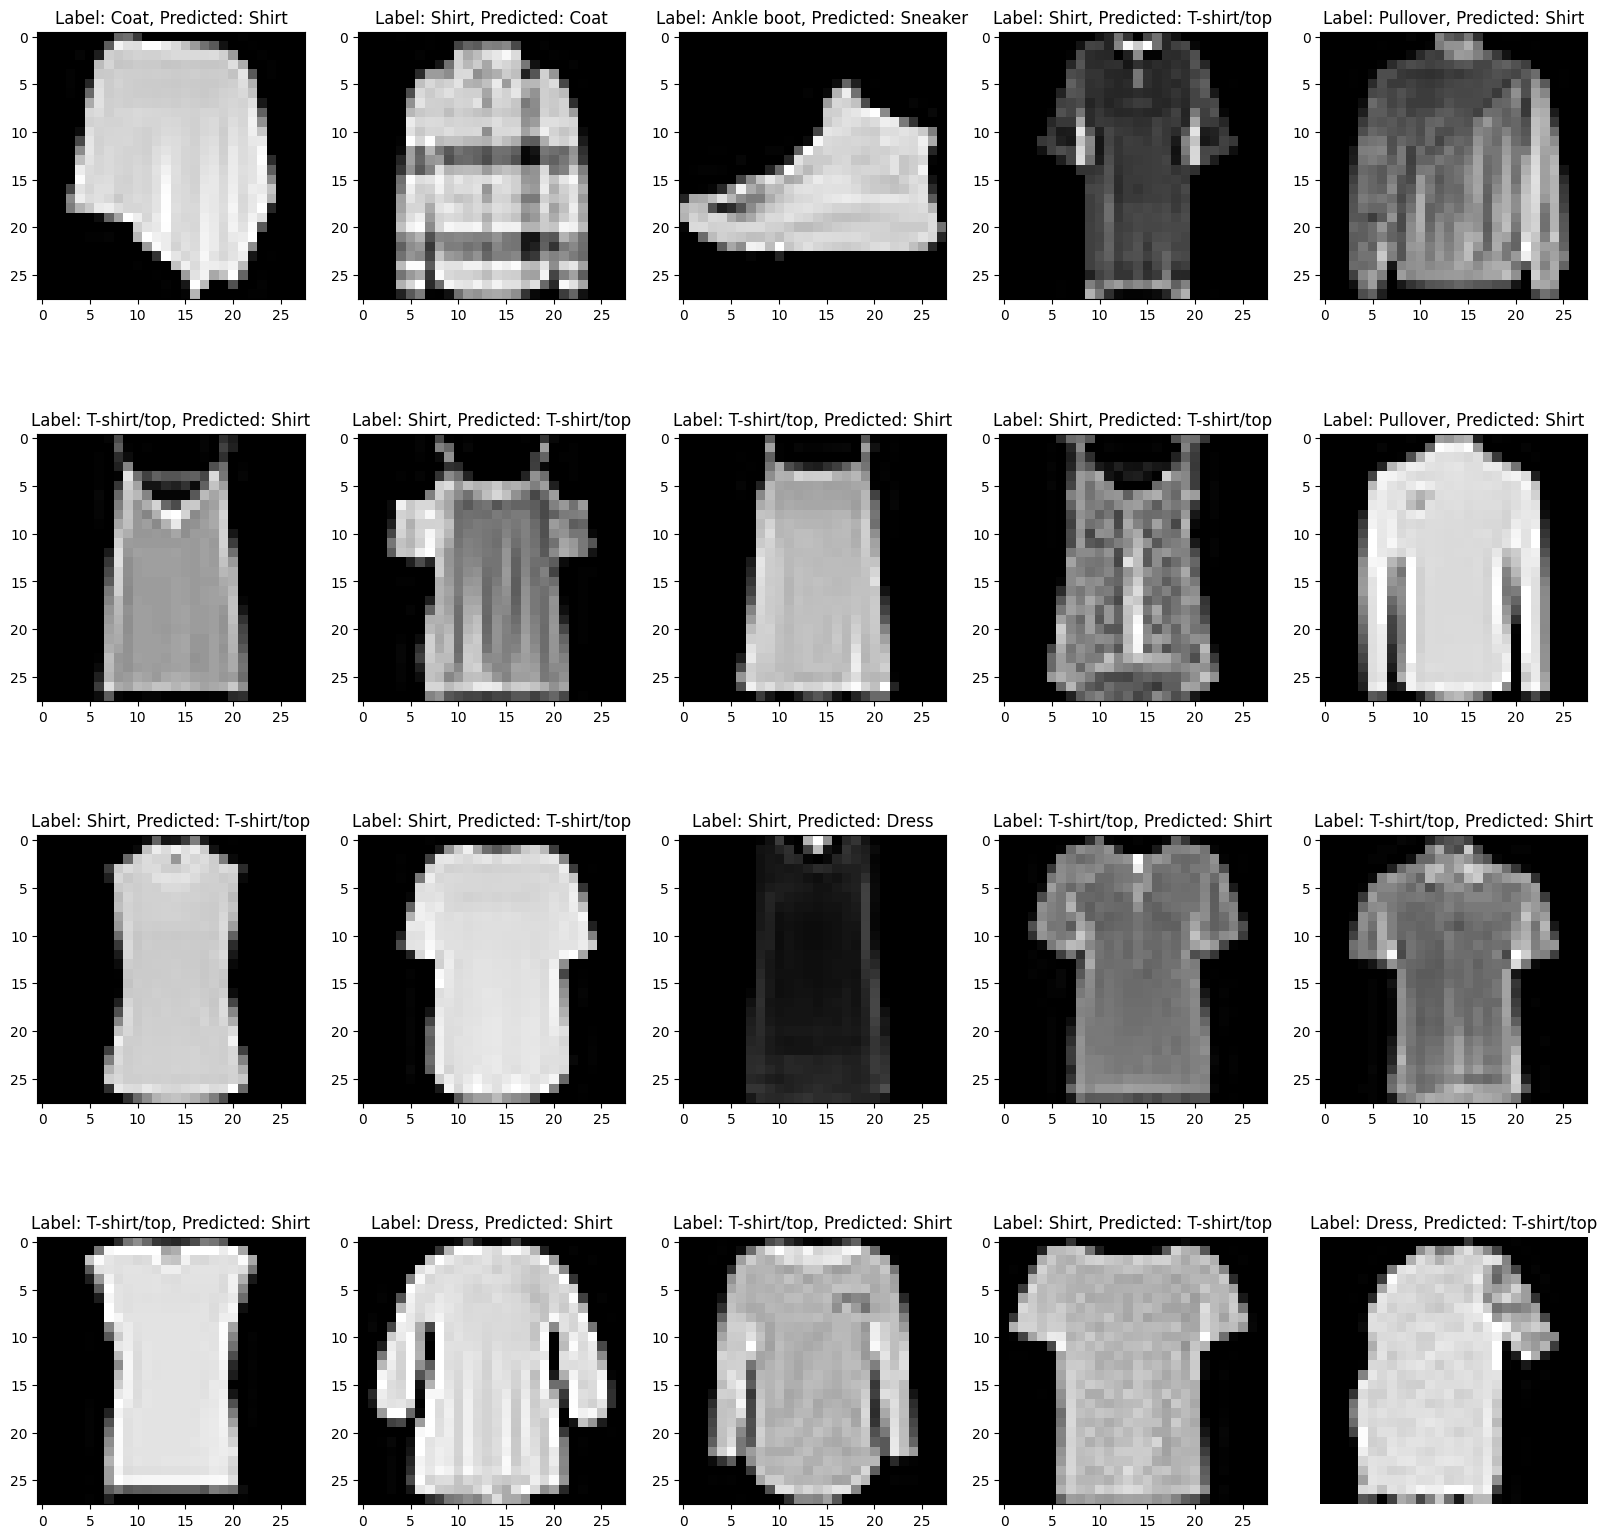

In [52]:
random_idxs = np.random.choice(X_test_wrong.shape[0], 20, replace=False)

fig, ax = plt.subplots(4, 5, figsize=(20, 20))
plt.axis("off")
for idx, subplot in zip(random_idxs, ax.ravel()):
  pred = class_labels[y_pred_wrong[idx]]
  actual = class_labels[y_test_wrong[idx]]
  subplot.imshow(X_test_wrong[idx], cmap='gray')
  subplot.set_title(f"Label: {actual}, Predicted: {pred}")

When looking at a sample of the examples where the model made a wrong prediction, we can see that there is a common thread:

The low pixel resolution makes it ambguious even to a human what the correct class is. For instance, the first image looks like a coat (but is actually a shirt)

So, it does appear that the mistakes the model is making is reasonable but further improvements can be made. In fact, according to benchmarks done to measure real human performance on the Fashion MNIST dataset, human level accuracy by non-fashion experts was 83.5%. So, the model is actually doing quite well.

## Summary
In summary, I experimented with various models, and found that a custom built VGG16 with batch normalization, L2 regularisation and CutMix data augmentation performed the best with the least overfitting.

- The final model has a high validation accuracy, and does well on the testing set, suggesting that it does not overfit
- The parts where it does badly are those examples where the images are ambigious themselves, suggesting that the poor resolution of the images hampers the ability of the model to learn
- Perhaps with more experimentation, I might find them to perform better, but I am satisified with the current model that I have, as it is fairly light weight (in comparison to other models)
- There is also more room for exploration in terms of the learning rate scheduler, optimizer and certain architectural improvements
- I am certain that if we were to hyperparameter tune our model we would see our model make less mistakes, thats one way on improving